## 2022-08-015: Color Space Pipeline

*Last Updated*: 2022-08-15

### Authors

* April Zhang (april.zhang@berkeley.edu)
* Kevin Chu (kevin@velexi.com)


### Overview

This Jupyter notebook ...

The example data pipeline component is defined by the following signature:

* __input__: folder path for images

* __output__: ...

* __data processing__: ...

### Structure of Notebook

* __Data Processing Functions__: implementations, basic documentation, and unit tests for
  data pipeline component

* __Experimentation & Development__: configure experiment, prepare data, transform data using data processing functions, and analyze results

In [59]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from PIL import Image
import os
import glob
import cv2
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [ ]:
#PARAMETER TUNING
IMAGE_PATH = "/Users/aprilzhang/Downloads/test-images/"
threshold = 0.85

In [66]:
def load_images_from_folder(IMAGE_PATH):
    files = glob.glob(IMAGE_PATH + '/*.jpeg', recursive = True)
    images = []
    for image in files: 
        img = cv2.imread(image)
        print("read " + image)
        images.append(img)
    return images
img_list = load_images_from_folder(IMAGE_PATH)

read /Users/aprilzhang/Downloads/test-images/16B45EFF-7F1D-4437-B8FA-C7D4ADBF4F92.jpeg
read /Users/aprilzhang/Downloads/test-images/7F301A45-1207-4B6A-A05A-72B320B25E95.jpeg
read /Users/aprilzhang/Downloads/test-images/6C550AAE-8181-41AA-829C-B42D255A9E2F.jpeg
read /Users/aprilzhang/Downloads/test-images/5A7E3A5F-334A-4C8D-9E0D-BD435389C81E.jpeg
read /Users/aprilzhang/Downloads/test-images/E4FE4EBA-68AA-434C-8260-54646D0C4AC3.jpeg


In [67]:
#getting RGB values of pixels
(B, G, R) = cv2.split(img_list[0])
B = B.flatten()[::100]
G = G.flatten()[::100]
R = R.flatten()[::100]
print(len(B))

121928


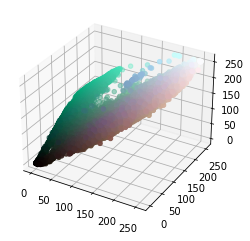

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(R, G, B, c = list(zip(R/255, G/255, B/255)), marker="o")
plt.show()

In [69]:
#projection of each pixel color onto the green direction
green = (0, 255, 0) #need to confirm this!
green = np.array(green)
c = list(zip(R, G, B))

proj = [(np.dot(i, green)/np.linalg.norm(green)**2 * green)/255 for i in c]


In [70]:
proj_thres = [x for x in proj if x[1] > threshold] #set value for "greeness threshold" 

In [71]:
print(len(proj_thres))

2791


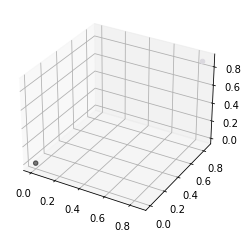

In [72]:
#plotting thresholded green
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection="3d")
ax1.scatter(proj_thres[0], proj_thres[1], proj_thres[2], c = list(zip(proj_thres[0], proj_thres[1], proj_thres[2])), marker="o")
plt.show()